### 📢 Don't forget to upvote if you enjoy my work :)

# Introduction
In this notebook, I aim to provide a beginner-friendly introduction to **Decision Trees** - powerful and widely-used algorithms for solving classification and regression problems.
We'll cover basic theory behind these models, explore how and when to use them, and walk through hands-on examples using real-world datasets

## What is a predictive model?
A predictive model is a machine learning algorithm trained on historical data to make predictions about unseen or future data. These models learn patterns or relationships between input features (like age, income, temperature) and target variables (such as "Will a customer buy?" or "What will the temperature be tomorrow?").
## Why use Decision Trees and Random Forests?
Decision Trees and Random Forests are especially useful when:
- You’re working with tabular data (columns and rows, like spreadsheets or CSV files),
- You want interpretable results (trees are easy to visualize and understand),
- You don’t want to worry too much about data scaling or normalization,
- You want a quick and effective baseline model,
- Your data contains a mix of numerical and categorical features.

These models are also quite robust to outliers and missing values, and Random Forest in particular tend to perform well out of the box on many real-world problems.

# Decision Tree - Theory
A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It splits data into smaller and smaller subsets based on feature values, creating a tree-like model of decisions.

At each step (called a node), the algorithm chooses the feature and value that best splits the data to improve prediction accuracy. The result is a set of if-then decision rules.

## How does it work?
- The tree starts at the root node, containing the full dataset.
- At each node, the algorithm selects a feature and threshold that produces the best possible split based on a chosen metric.
- This splitting continues recursively creating branches, until stopping criteria are met (like reaching max_depth or a minimum number of samples).
- For classification, a prediction is made by majority vote in a leaf node; for regression, by computing the mean value.

## Common split criteria:
- Gini Impurity (default for classification in sklearn)
- Entropy (information gain)
- Mean Squared Error (for regression)

## Underfitting and Overfitting
- A shallow tree may underfit — it’s too simple to capture the underlying patterns.
- A deep tree (high depth, many nodes) can overfit the training data — it memorizes patterns, including noise, and performs poorly on unseen data.
- The goal is to find the right balance using proper depth and constraints.

## Pros and cons of Decision Trees
Pros:
- Easy to understand and visualize
- Can handle both numerical and categorical features
- No need to normalize or scale features
- Handles missing values and outliers relatively well

Cons:
- Can easily overfit
- Sensitive to small changes in data (high variance)
- Greedy splitting may not always lead to the globally optimal tree structure
- Performance can be lower compared to ensemble models like Random Forest

# Decision Tree - Implementation in Scikit-Learn
### To use a Decision Tree in Python, you can import it from sklearn.tree:

In [1]:
from sklearn.tree import DecisionTreeClassifier #for classification problems
from sklearn.tree import DecisionTreeRegressor #for regression problems

## Key Parameters
- criterion - function to measure the quality of a split (typically: 'gini' or 'entropy')
- splitter - strategy to choose the split at each node ('best' or 'random')
- max_depth - maximum depth of the tree, limits overfitting
- min_samples_split - minimum number of samples required to split an internal node
- min_samples_leaf - minimum number of samples required to be at a leaf node
- min_weight_fraction_leaf - minimum weighted fraction of the total sum of weights in a leaf
- max_features - number of features to consider when looking for the best split
- random_state - controls randomness for reproducibility
- max_leaf_nodes - maximum number of leaf nodes
- min_impurity_decrease - minimum impurity decrease required to make a split
- class_weight - weights associated with classes (only for classification)
- ccp_alpha - complexity parameter for Minimal Cost-Complexity Pruning

Most commonly tuned parameters for starters:
- max_depth
- min_samples_leaf
- max_leaf_nodes
- ccp_alpha
- class_weight (only for classification)
- criterion


Which parameters should you set?
- Start with default values, but tune max_depth, min_samples_split, and min_samples_leaf to reduce overfitting.
- If your dataset is imbalanced, set class_weight='balanced'.
- Use random_state for consistent results when experimenting.

In [2]:
#DecisionTreeRegressor?
'''
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
'''

"\n    criterion='squared_error',\n    splitter='best',\n    max_depth=None,\n    min_samples_split=2,\n    min_samples_leaf=1,\n    min_weight_fraction_leaf=0.0,\n    max_features=None,\n    random_state=None,\n    max_leaf_nodes=None,\n    min_impurity_decrease=0.0,\n    ccp_alpha=0.0,\n"

In [3]:
#DecisionTreeClassifier?
'''
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
'''

"\n    criterion='gini',\n    splitter='best',\n    max_depth=None,\n    min_samples_split=2,\n    min_samples_leaf=1,\n    min_weight_fraction_leaf=0.0,\n    max_features=None,\n    random_state=None,\n    max_leaf_nodes=None,\n    min_impurity_decrease=0.0,\n    class_weight=None,\n    ccp_alpha=0.0,\n"

# Decision Tree Classifier - Mushroom Dataset
The Mushroom Classification Dataset is a well-known dataset from the UCI Machine Learning Repository. It contains descriptions of hypothetical samples of mushrooms, each classified as either **edible** or **poisonous**. The goal is to build a model that can accurately predict whether a mushroom is safe to eat based on its physical characteristics.
- Number of samples: 8124 mushrooms
- Target variable: e - edible, p - poisonous
- Features (all categorical)
  Examples include:
  - cap-shape (bell, conical, convex, flat, knobbed, sunken)
  - cap-color (brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow)
  - odor (almond, anise, foul, none, pungent, spicy, fishy, musty)
  - gill-size, gill-color
  - stalk-shape, stalk-surface
  - habitat (woods, meadows, urban, etc.)
## Objective
We will train a DecisionTreeClassifier to learn patterns in these categorical features and determine whether a mushroom is edible or poisonous. Since all features are categorical, they need to be encoded before fitting the model. The dataset is relatively clean, with no missing values, which makes it ideal for demonstrating classification concepts.
## Why this dataset?
- Easy to understand: clear binary classification task.
- Interpretable results: decision trees provide human-readable decision rules.
- High accuracy potential: many features are strongly correlated with edibility, making it a great example of how decision trees can capture complex patterns.

## Import Libraries & Load Dataset
### First, we import the necessary libraries for data handling, visualisation and modeling. We also load the Mushroom dataset and take a fist look.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

mushroom_dataset_url = '/kaggle/input/mushroom-classification/mushrooms.csv'
df = pd.read_csv(mushroom_dataset_url)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Exploratory Data Analysis (EDA)
### Quick check of the dataset info, basic statistics and missing values:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
df.isnull().sum().sum()

0

### We also inspect unique values in each column to understand categorical features.

In [8]:
for c in df.columns:
    print(f'Column "{c}" contains: {df[c].unique()}')

Column "class" contains: ['p' 'e']
Column "cap-shape" contains: ['x' 'b' 's' 'f' 'k' 'c']
Column "cap-surface" contains: ['s' 'y' 'f' 'g']
Column "cap-color" contains: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Column "bruises" contains: ['t' 'f']
Column "odor" contains: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Column "gill-attachment" contains: ['f' 'a']
Column "gill-spacing" contains: ['c' 'w']
Column "gill-size" contains: ['n' 'b']
Column "gill-color" contains: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Column "stalk-shape" contains: ['e' 't']
Column "stalk-root" contains: ['e' 'c' 'b' 'r' '?']
Column "stalk-surface-above-ring" contains: ['s' 'f' 'k' 'y']
Column "stalk-surface-below-ring" contains: ['s' 'f' 'y' 'k']
Column "stalk-color-above-ring" contains: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Column "stalk-color-below-ring" contains: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Column "veil-type" contains: ['p']
Column "veil-color" contains: ['w' 'n' 'o' 'y']
Column "ring-number" cont

### Feature "stalk-root" contains "?", so I replaced it with "unknown" which is more representative. Then we visualize the distribution of the target variable.

In [9]:
df['stalk-root'] = df['stalk-root'].replace('?', 'unknown')
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r', 'unknown'], dtype=object)

Text(0.5, 1.0, 'Target variable distribution (edible vs poisonous)')

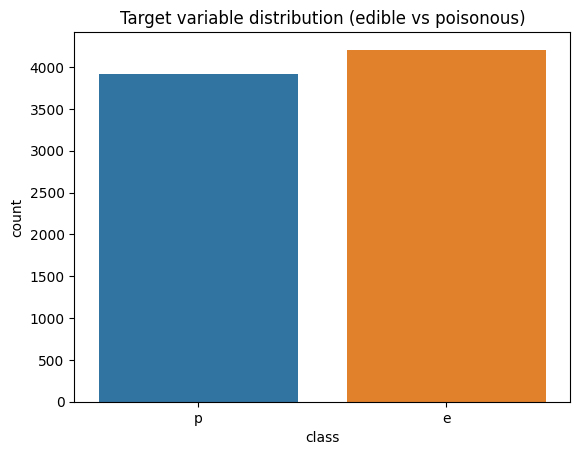

In [10]:
sns.countplot(data=df, x='class')
plt.title('Target variable distribution (edible vs poisonous)')

## Data Preprocessing
Since all features are categorical, we apply one-hot encoding to convert them into numerical format suitable for scikit-learn.

Why drop one column (drop_first=True)?
When you have n categories, creating n binary columns can lead to redundancy, because the last column can always be inferred from the others.
- This redundancy is called multicollinearity, which can confuse some models (especially linear models).
- By dropping the first column (drop_first=True), we reduce the number of columns to n-1, keeping all the information but removing redundancy.

Example:

In [11]:
df_dummies = pd.get_dummies(data=df, drop_first=True, dtype=int)
df_dummies

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


## Split Data
### We separate features (X) and target (y). Then split the dataset into training and testing sets. We also check chapes and proportions to ensure the split is balanced:

In [12]:
X = df_dummies.copy()
y = X.pop('class_p')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape} \n')

print(f'Percentage of data in X_train: {len(X_train)/len(df_dummies)}')
print(f'Percentage of data in X_test: {len(X_test)/len(df_dummies)}')
print(f'Percentage of data in y_train: {len(y_train)/len(df_dummies)}')
print(f'Percentage of data in y_test: {len(y_test)/len(df_dummies)}\n')

print(f'Number of elements in y_train: {y_train.value_counts()}\n')
print(f'Percentage of elements in y_train: {y_train.value_counts()/len(y_train)}\n')
print(f'Number of elements in y_test: {y_test.value_counts()}\n')
print(f'Percentage of elements in y_test: {y_test.value_counts()/len(y_test)}\n')


Shape of X_train: (6499, 95)
Shape of X_test: (1625, 95)
Shape of y_train: (6499,)
Shape of y_test: (1625,) 

Percentage of data in X_train: 0.7999753815854259
Percentage of data in X_test: 0.2000246184145741
Percentage of data in y_train: 0.7999753815854259
Percentage of data in y_test: 0.2000246184145741

Number of elements in y_train: class_p
0    3365
1    3134
Name: count, dtype: int64

Percentage of elements in y_train: class_p
0    0.517772
1    0.482228
Name: count, dtype: float64

Number of elements in y_test: class_p
0    843
1    782
Name: count, dtype: int64

Percentage of elements in y_test: class_p
0    0.518769
1    0.481231
Name: count, dtype: float64



# Decision Tree Model Training for Classification Purposes
### We initialize DecissionTreeClassifier and tune max_depth and min_samples_leaf using GridSearchCV for better performance:

In [13]:
clf = DecisionTreeClassifier(random_state=1)
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 4), 'min_samples_leaf': [3, 5, 10, 20, 30, 40, 50]}
gs = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=5)
gs.fit(X_train, y_train)
print(f'Best score: {gs.best_score_}\nBest Parameters: {gs.best_params_}')

Best score: 0.9863054420560194
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 20}


## Model Evaluation
### We predict on the test set and evaluate accuracy:

Accuracy: 0.9809230769230769
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       843
           1       0.96      1.00      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



Text(0.5, 1.0, 'Confusion Matrix')

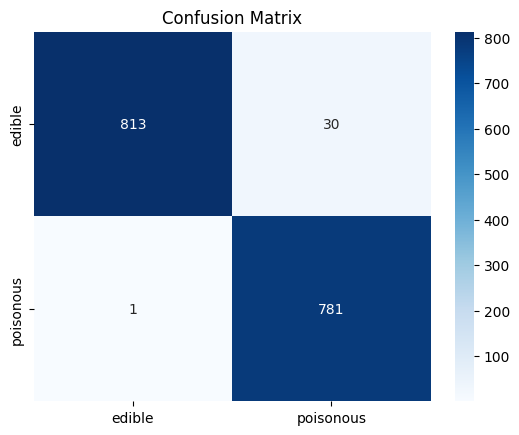

In [14]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['edible','poisonous'],
            yticklabels=['edible','poisonous'])
plt.title("Confusion Matrix")

## Visualizing the Decision Tree
### For better interpretability, we export the tree structure:

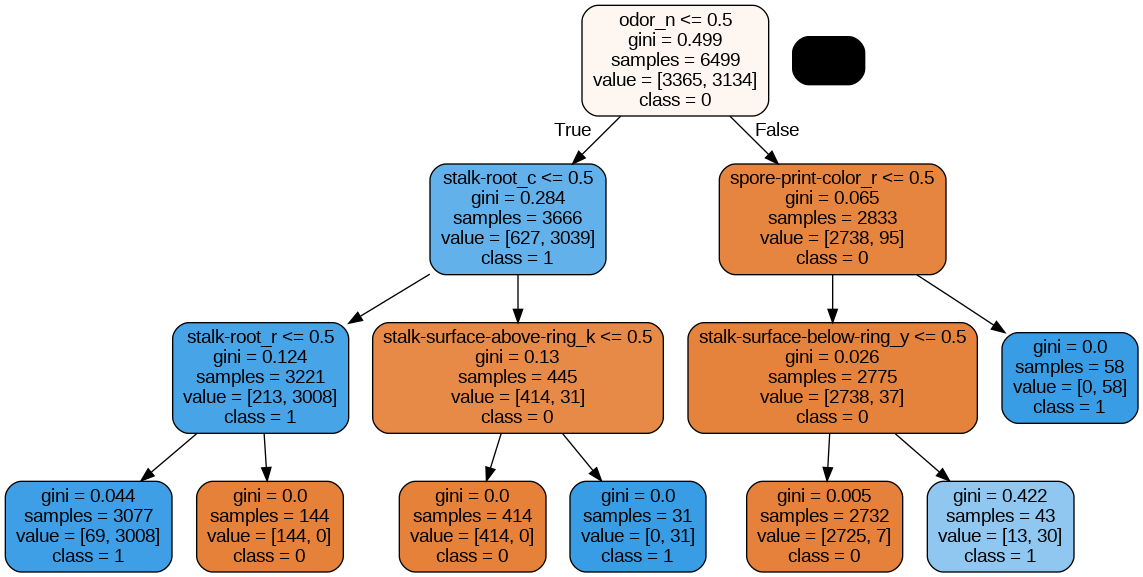

In [15]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(best_model, out_file=dot_data, feature_names=X.columns, class_names=['0', '1'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Feature Importance
### We inspect the most influential features that the model uses to make decisions:

In [16]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
importances[:10]

odor_n                        0.656915
stalk-root_c                  0.189715
stalk-root_r                  0.085410
spore-print-color_r           0.035933
stalk-surface-above-ring_k    0.018737
stalk-surface-below-ring_y    0.013289
cap-shape_c                   0.000000
veil-color_w                  0.000000
veil-color_o                  0.000000
stalk-color-below-ring_y      0.000000
dtype: float64

# Decision Tree Regressor - Medical Cost Personal Dataset
The Medical Cost Personal Dataset contains information about individuals and their annual medical insurance charges. The main goal is to predict insurance charges based on personal attributes such as:
- Numerical features: age, bmi, children
- Categorical features: sex, smoker, region

Before modeling, we need to understand the data, check for missing values, and explore relationships between features.

## Import Libraries & Load Dataset
### We import the necessary libraries for data handling, visualisation and modeling. We also load the dataset and take a fist look.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

medical_cost_personal_dataset_url = '/kaggle/input/insurance/insurance.csv'
df = pd.read_csv(medical_cost_personal_dataset_url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)
We start by inspecting the dataset with .info() and .describe() Then we:
- Check correlations between numeric features using a heatmap to understand linear relationships.
- Visualize distributions of categorical variables (sex, smoker, region) to see class balance.

This helps identify potential patterns, outliers or skewed distributions.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [20]:
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [21]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Correlation between numeric features')

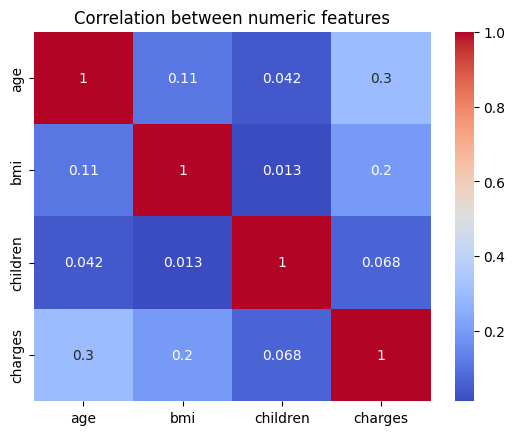

In [23]:
numeric_features = ['age', 'bmi', 'children', 'charges']
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between numeric features')

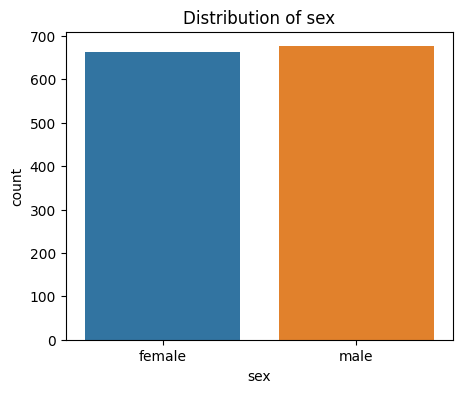

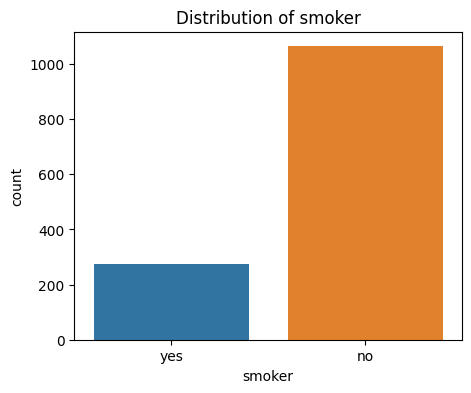

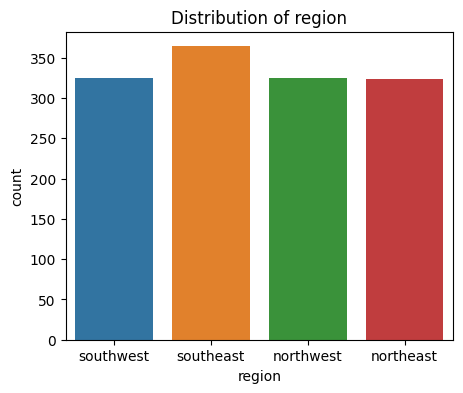

In [24]:
categorical_features = ['sex', 'smoker', 'region']
for c in categorical_features:
    plt.figure(figsize=(5, 4))
    sns.countplot(df, x=c)
    plt.title(f'Distribution of {c}')
    plt.show()

## Encoding categorical variables
We apply one-hot encoding:
- Converts categorical features into binary columns.
- Dropping the first column avoids multicollinearity, keeping n-1 columns for n categories while preserving all information.

In [25]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int)
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


## Split Data
### After encoding, we split the data into features (X) and target (y = charges), then perform a train-test split (80/20).

In [26]:
X = df_encoded.copy()
y = X.pop('charges')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape} \n')

print(f'Percentage of data in X_train: {len(X_train)/len(df_encoded)}')
print(f'Percentage of data in X_test: {len(X_test)/len(df_encoded)}')
print(f'Percentage of data in y_train: {len(y_train)/len(df_encoded)}')
print(f'Percentage of data in y_test: {len(y_test)/len(df_encoded)}')

Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,) 

Percentage of data in X_train: 0.7997010463378177
Percentage of data in X_test: 0.20029895366218237
Percentage of data in y_train: 0.7997010463378177
Percentage of data in y_test: 0.20029895366218237


# Decision Tree Model Training for Regression purposes
We use DecisionTreeRegressor to model the relationship between personal attributes and insurance charges.
- Hyperparameter tuning with GridSearchCV:
  - max_depth: controls the maximum depth of the tree (prevents overfitting).
  - min_samples_leaf: ensures each leaf has a minimum number of samples for stability.
- The best model is selected based on cross-validated R2 score.

In [27]:
reg = DecisionTreeRegressor(random_state=1)
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 10), 'min_samples_leaf': [1, 3, 5, 10, 20]}
gs = GridSearchCV(reg, param_grid=param_grid, scoring='r2', cv=5)
gs.fit(X_train, y_train)
print(f'Best score: {gs.best_score_}\nBest Parameters: {gs.best_params_}')

Best score: 0.8461702022100763
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 10}


## Model Evaluation
We evaluate performance on the test set using:
- R2 score - proportion of variance explained by the model.
- RMSE (Root Mean Squared Error) - average prediction error magnitude.
- MAE (Mean Absolute Error) – average absolute error.
- Maximum Error – largest single prediction error.

We also visualize residuals (errors) with a histogram to check for bias or skewness.

In [28]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

print('Train R2:', r2_score(y_test, y_pred))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Test MAE:', mean_absolute_error(y_test, y_pred))
print('Maximum Error:', max_error(y_test, y_pred))

Train R2: 0.8704619474529574
Test RMSE: 4397.445092104791
Test MAE: 2537.4130330212465
Maximum Error: 24438.266688748503


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


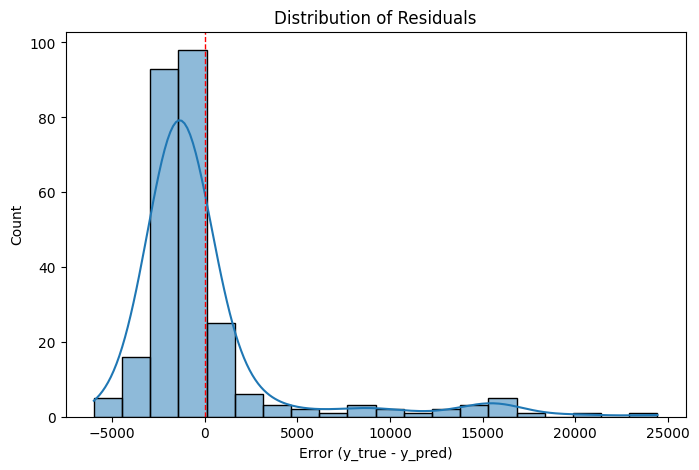

In [29]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.title("Distribution of Residuals")
plt.xlabel("Error (y_true - y_pred)")
plt.ylabel("Count")
plt.show()

## Feature Importance
Decision trees provide feature importance, indicating how much each feature contributes to reducing prediction error:
- smoker_yes typically has the highest importance (predictably strong impact on charges),
- numeric features like age and bmi also play a major role.

We visualize the top features with a horizontal bar plot.

In [30]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
importances

smoker_yes          0.717381
bmi                 0.165313
age                 0.113912
children            0.003394
sex_male            0.000000
region_northwest    0.000000
region_southeast    0.000000
region_southwest    0.000000
dtype: float64

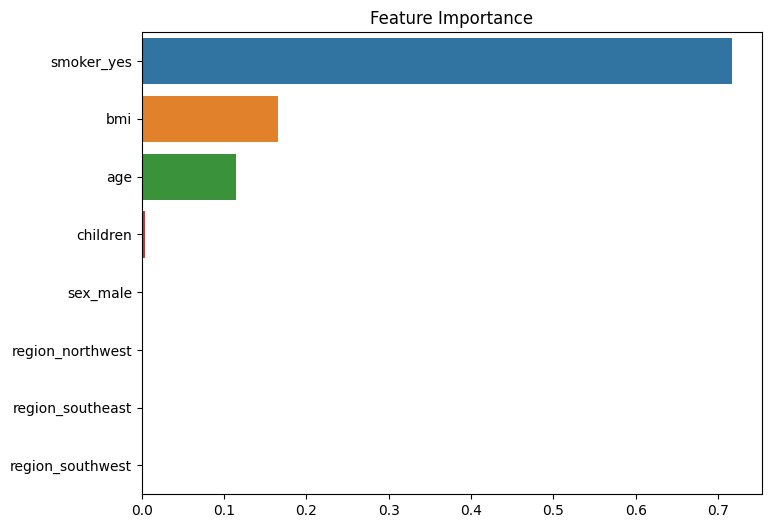

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.show()

## Overfitting and Tree Depth
Finally, we analyze model performance vs tree depth:
- Shallow trees -> underfitting (low training and test scores).
- Deep trees -> overfitting (high training score but lower test score).

The plot of R2 vs max depth helps select a depth that balances bias and variance.

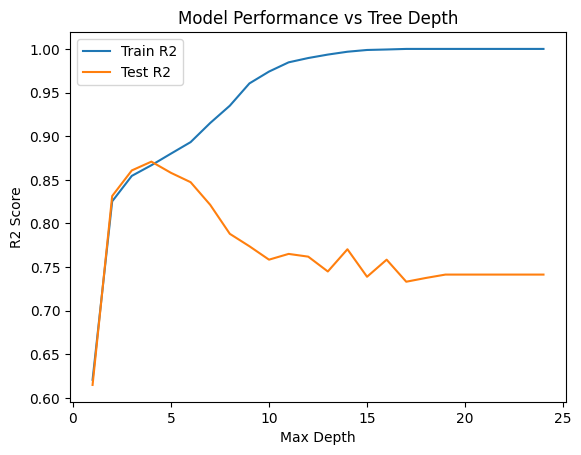

In [32]:
train_scores = []
test_scores = []
depths = range(1, 25)

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=1)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(depths, train_scores, label="Train R2")
plt.plot(depths, test_scores, label="Test R2")
plt.xlabel("Max Depth")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Model Performance vs Tree Depth")
plt.show()


# Summary & Tips
- Decision Trees handle both numerical and categorical features.
- One-hot encoding is essential for categorical data.
- Hyperparameter tuning (max_depth, min_samples_leaf) is crucial to avoid overfitting.
- Feature importance provides interpretable insights about which variables drive the target prediction.
- Residual analysis ensures that predictions are reasonable and errors are randomly distributed.

Decision Trees are a versatile and interpretable machine learning method, capable of handling both classification and regression tasks without the need for feature scaling. They offer clear decision rules that can be visualized and understood even by non-technical stakeholders. However, they are prone to overfitting, especially when grown deep without constraints. Careful tuning of parameters such as max_depth and min_samples_leaf can significantly improve generalization.

Thank you for taking the time to go through this notebook. I hope it provided you with both the theoretical understanding and the practical skills needed to effectively apply decision trees in your own projects :)